In [16]:
import numpy as np
import matplotlib.pyplot as plt

10,10,10,10,10

In [1]:
(10+10+10+10+10)/5

10.0

In [18]:

(10+10+10+10+10)/5

10.0

In [24]:
a =np.array([10,10,10,10])

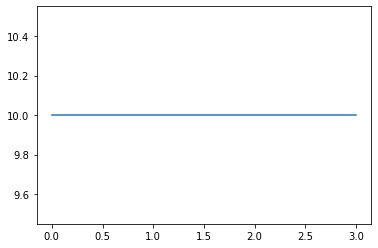

In [25]:
plt.plot(a)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
covidtotales = pd.read_csv("data/covidtotals.csv")
covidtotales.set_index("iso_code", inplace=True)
totales=['location','total_cases','total_deaths','total_cases_pm','total_deaths_pm']
demograficas=['population','pop_density','median_age','gdp_per_capita','hosp_beds']

In [27]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqline
import scipy.stats  as scistats

# PROFUNDIZAR LOS PAQUETES VISTOS

In [28]:

covidtotales_cumu = covidtotales.loc[:, totales] 

In [29]:
covidtotales_cumu

,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm
iso_code,,,,,
AFG,Afghanistan,15205,257,390.589,6.602
ALB,Albania,1137,33,395.093,11.467
DZA,Algeria,9394,653,214.225,14.891
AND,Andorra,764,51,9888.048,660.066
AGO,Angola,86,4,2.617,0.122
...,...,...,...,...,...
VNM,Vietnam,328,0,3.370,0.000
ESH,Western Sahara,23,1,38.505,1.674
YEM,Yemen,323,80,10.829,2.682


In [31]:
covidtotales_cumu.describe()

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
count,2.100000e+02,210.000000,209.000000,209.000000
mean,2.921614e+04,1770.714286,1361.842909,55.925440
std,1.363978e+05,8705.565857,2629.894101,145.081876
min,0.000000e+00,0.000000,0.894000,0.000000
25%,1.757500e+02,4.000000,96.785000,0.893000
50%,1.242500e+03,25.500000,281.997000,6.214000
75%,1.011700e+04,241.250000,1803.318000,32.158000
max,1.790191e+06,104383.000000,19771.348000,1237.551000


In [32]:
pd.options.display.float_format='{:,.2f}'.format

In [33]:
covidtotales_cumu.quantile(np.arange(0.0,1.1,0.1))

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
0.00,0.00,0.00,0.89,0.00
0.10,22.90,0.00,18.49,0.00
0.20,105.20,2.00,56.74,0.40
0.30,302.00,6.70,118.23,1.73
0.40,762.00,12.00,214.92,3.97
0.50,"1,242.50",25.50,282.00,6.21
0.60,"2,514.60",54.60,546.05,12.56
0.70,"6,959.80",137.20,"1,074.03",26.06
0.80,"16,847.20",323.20,"2,208.74",50.29
0.90,"46,513.10","1,616.90","3,772.00",139.53


In [34]:
covidtotales_cumu.skew()

total_cases       10.80
total_deaths       8.93
total_cases_pm     4.39
total_deaths_pm    4.66
dtype: float64

In [36]:
covidtotales_cumu.kurtosis()

total_cases       134.98
total_deaths       95.74
total_cases_pm     25.14
total_deaths_pm    27.11
dtype: float64

In [38]:
covidtotales_cumu.total_cases.mean()

29216.138095238097

In [39]:
covidtotales_cumu.shape

(210, 5)

In [42]:
def testear_normalidad(columna, dataframe):
    stat, p = scistats.shapiro(dataframe[columna])
    return p

### TAREA REVISAR P-VALOR

In [43]:
testear_normalidad("total_cases",covidtotales_cumu)

3.753789128593843e-29

In [44]:
testear_normalidad("total_deaths",covidtotales_cumu)

4.3427896631016077e-29

In [45]:
testear_normalidad("total_cases_pm",covidtotales_cumu)

1.0

In [46]:
testear_normalidad("total_deaths_pm",covidtotales_cumu)

1.0

### TAREA REVISAR KDE (hint:Kernel) y TAREA describir funciones y como se interpreta en pandas

<AxesSubplot:ylabel='Density'>

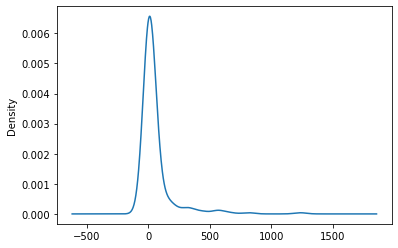

In [56]:
covidtotales_cumu["total_deaths_pm"].plot.kde()

<AxesSubplot:ylabel='Density'>

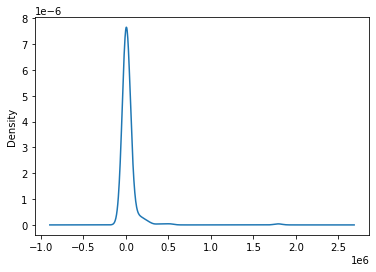

In [57]:
covidtotales_cumu["total_cases"].plot.kde()

Text(0.5, 1.0, 'QQ-plot de los casos totales')

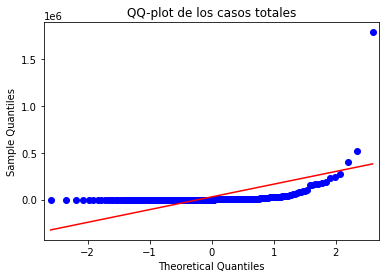

In [62]:
sm.qqplot(covidtotales_cumu[['total_cases']].sort_values(['total_cases']), line='s')
plt.title("QQ-plot de los casos totales")

Text(0.5, 1.0, 'QQ-plot de los casos totales por millon')

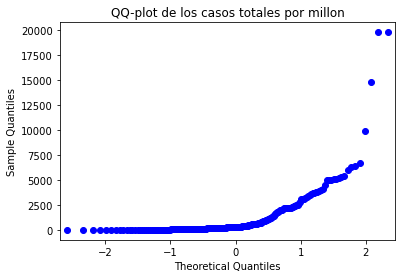

In [63]:
sm.qqplot(covidtotales_cumu[['total_cases_pm']].sort_values(['total_cases_pm']), line='s')
plt.title("QQ-plot de los casos totales por millon")

In [64]:
tercerq, primerq = covidtotales_cumu.total_cases.quantile(0.75),covidtotales_cumu.total_cases.quantile(0.25)

In [65]:
entre_cuartiles= 1.5*(tercerq-primerq)

In [66]:
outlier_alto, outlier_bajo = entre_cuartiles+tercerq , primerq-entre_cuartiles

In [67]:
print(outlier_bajo,outlier_alto,sep=" <--RANGO--> ")

-14736.125 <--RANGO--> 25028.875


In [80]:
covidtotales_cumu.total_cases_pm.describe()

count      209.00
mean     1,361.84
std      2,629.89
min          0.89
25%         96.78
50%        282.00
75%      1,803.32
max     19,771.35
Name: total_cases_pm, dtype: float64

In [74]:
def get_outliers():
    dfsalida =pd.DataFrame(columns=covidtotales.columns, data=None)
    for col in covidtotales_cumu.columns[1:]:
        tercerq, primerq = covidtotales_cumu[col].quantile(0.75),covidtotales_cumu[col].quantile(0.25)
        entre_cuartiles= 1.5*(tercerq-primerq)
        outlier_alto, outlier_bajo = entre_cuartiles+tercerq , primerq-entre_cuartiles
    temporal= covidtotales.loc[(covidtotales[col]>outlier_alto) | (covidtotales[col]<outlier_bajo)]
    temporal = temporal.assign(varname= col, umbral_bajo=outlier_bajo, umbral_alto=outlier_alto)
    dfsalida = pd.concat([dfsalida, temporal])
    return dfsalida

In [75]:
todos_outliers= get_outliers()

In [76]:
todos_outliers

,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds,varname,umbral_bajo,umbral_alto
AND,2020-06-01,Andorra,764,51,"9,888.05",660.07,"77,265.00",163.75,NaN,NaN,NaN,total_deaths_pm,-46.00,79.06
BEL,2020-06-01,Belgium,58381,9467,"5,037.35",816.85,"11,589,616.00",375.56,41.80,"42,658.58",5.64,total_deaths_pm,-46.00,79.06
BMU,2020-06-01,Bermuda,140,9,"2,248.16",144.53,"62,273.00","1,308.82",NaN,"50,669.32",NaN,total_deaths_pm,-46.00,79.06
BRA,2020-06-01,Brazil,514849,29314,"2,422.14",137.91,"212,559,409.00",25.04,33.50,"14,103.45",2.20,total_deaths_pm,-46.00,79.06
CAN,2020-06-01,Canada,90936,7295,"2,409.40",193.28,"37,742,157.00",4.04,41.40,"44,017.59",2.50,total_deaths_pm,-46.00,79.06
DNK,2020-06-01,Denmark,11669,574,"2,014.61",99.10,"5,792,203.00",136.52,42.30,"46,682.51",2.50,total_deaths_pm,-46.00,79.06
ECU,2020-06-01,Ecuador,39098,3358,"2,216.05",190.33,"17,643,060.00",66.94,28.10,"10,581.94",1.50,total_deaths_pm,-46.00,79.06
FRA,2020-06-01,France,151753,28802,"2,324.88",441.25,"65,273,512.00",122.58,42.00,"38,605.67",5.98,total_deaths_pm,-46.00,79.06
DEU,2020-06-01,Germany,181815,8511,"2,170.05",101.58,"83,783,945.00",237.02,46.60,"45,229.25",8.00,total_deaths_pm,-46.00,79.06
GGY,2020-06-01,Guernsey,252,13,"3,758.28",193.88,"67,052.00",NaN,NaN,NaN,NaN,total_deaths_pm,-46.00,79.06


In [77]:
todos_outliers.shape

(28, 14)

In [78]:
todos_outliers.to_excel("views/casos_atipicos.xlsx")

In [84]:
todos_outliers[['location','total_cases','total_cases_pm','total_deaths', 'population','total_deaths_pm']].sort_values(['total_deaths_pm'], ascending=False)

,location,total_cases,total_cases_pm,total_deaths,population,total_deaths_pm
SMR,San Marino,671,"19,771.35",42,"33,938.00","1,237.55"
BEL,Belgium,58381,"5,037.35",9467,"11,589,616.00",816.85
AND,Andorra,764,"9,888.05",51,"77,265.00",660.07
ESP,Spain,239429,"5,120.95",27127,"46,754,783.00",580.20
GBR,United Kingdom,274762,"4,047.40",38489,"67,886,004.00",566.97
ITA,Italy,233019,"3,853.99",33415,"60,461,828.00",552.66
FRA,France,151753,"2,324.88",28802,"65,273,512.00",441.25
SWE,Sweden,37542,"3,717.30",4395,"10,099,270.00",435.18
SXM,Sint Maarten (Dutch part),77,"1,795.62",15,"42,882.00",349.80
NLD,Netherlands,46442,"2,710.38",5956,"17,134,873.00",347.60
